In [121]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [122]:
os.getcwd()

'c:\\Users\\USER\\Desktop\\컴퓨터비전개론\\Image Filtering'

In [123]:
jy = cv2.imread("Sample Images/jy31.jpg", cv2.IMREAD_GRAYSCALE)

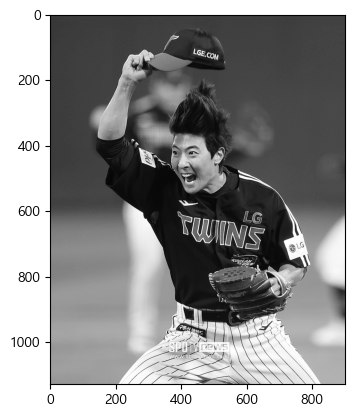

In [124]:
plt.imshow(jy, cmap="gray")

#### Part1. Image Filtering

The requirements of Part #1 will be evaluated by running ‘A1_image_filtering.py’ file.

1-1. Image Filtering by Cross-Correation

a) Implement two functions that return cross-correlation between an image and a 1D/2D kernel:

In [125]:
# d) Your functions should preserve the size of the input image. In order words, the sizes of img
# and filtered_img should be identical. To do this, you need to handle boundary cases on the
# edges of the image. Although you can take various approaches, you are asked to pad the image
# such that pixels lying outside the image have the same intensity value as the nearest pixel inside
# the image.

# filter_size = len of x-edge
def padding(img, p_size):
    row, col = img.shape
    top = np.repeat([img[0]], repeats=p_size, axis=0) # top padding
    bottom = np.repeat([img[-1]], repeats=p_size, axis=0) # bottom padding
    img = np.vstack([top, img, bottom]) 
    img = np.insert(img, [col]*p_size, img[:,[col-1]], axis=1) # right padding
    img = np.insert(img, [1]*p_size, img[:,[0]], axis=1) # left padding
    return img

In [126]:
def cross_correlation_1d(img, kernel=None):
    processed_img = []
    filter_size = kernel.shape[0] # filter의 길이

    # c) You can assume that the all kernels are odd sized along both dimensions.
    p_size = filter_size // 2 # padding의 크기
    padded_img = padding(img, p_size=p_size) # padding image
    row, col = padded_img.shape

    # b) Your function cross_correlation_1d should distinguish between vertical and horizontal
    # kernels based on the shape of the given kernel.
    for i in range(p_size, row-p_size):
        temp  = []
        for j in range(p_size, col-p_size):
            if kernel.ndim == 1: temp.append(np.dot(kernel, padded_img[i, j-p_size:j+p_size+1]))
            else: temp.append(np.dot(np.ravel(kernel), padded_img[i-p_size:i+p_size+1, j]))
        processed_img.append(temp)
    return np.array(processed_img)

In [127]:
def cross_correlation_2d(img, kernel=None):
    processed_img = []
    filter_size = kernel.shape[0] # filter의 한 변의 길이 (MxM Kernel이라고 할 때 ..)

    # c) You can assume that the all kernels are odd sized along both dimensions.
    p_size = filter_size // 2 # padding의 크기
    padded_img = padding(img, p_size=p_size) # padding image
    row, col = padded_img.shape

    for i in range(p_size, row-p_size):
        temp = []
        for j in range(p_size, col-p_size):
            temp.append(np.dot(kernel.ravel(), padded_img[i-p_size:i+p_size+1, j-p_size:j+p_size+1].ravel()))
        processed_img.append(temp)
    return np.array(processed_img)

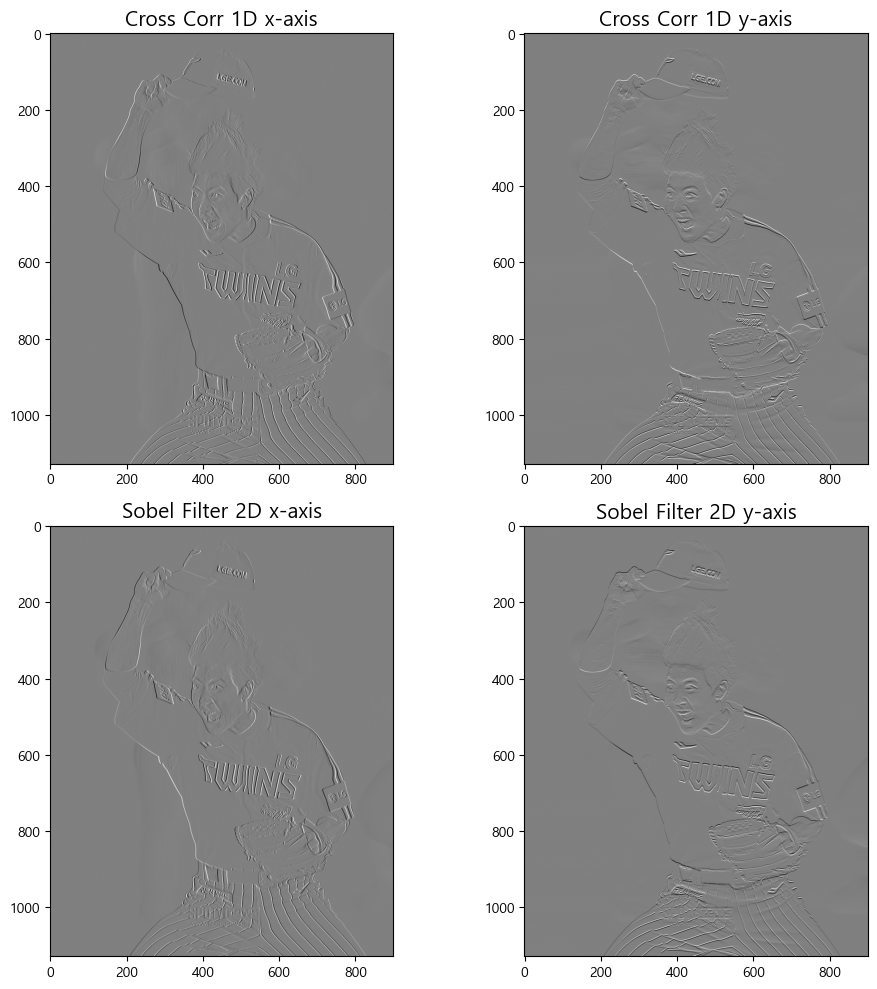

In [128]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

kernel_1d_x = np.array([-1, 0, 1])
kernel_1d_y = np.array([[-1], [0], [1]])
sobel_x = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
sobel_y = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])

ax[0,0].imshow(cross_correlation_1d(jy, kernel_1d_x), cmap="gray")
ax[0,0].set_title("Cross Corr 1D x-axis", size=15)
ax[0,1].imshow(cross_correlation_1d(jy, kernel_1d_y), cmap="gray")
ax[0,1].set_title("Cross Corr 1D y-axis", size=15)
ax[1,0].imshow(cross_correlation_2d(jy, sobel_x), cmap="gray")
ax[1,0].set_title("Sobel Filter 2D x-axis", size=15)
ax[1,1].imshow(cross_correlation_2d(jy, sobel_y), cmap="gray")
ax[1,1].set_title("Sobel Filter 2D y-axis", size=15)

plt.tight_layout()
plt.show()

1-2. The Gaussian Filter

In [129]:
def gaussian(i, j=0, sigma=1):
    return (1/(2*np.pi*sigma**2))*np.exp(-1*((i**2)+(j**2))/(2*sigma**2))

c:\Users\USER\anaconda3\envs\tf\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


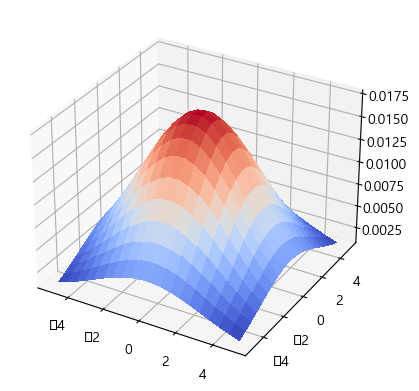

In [130]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

a = np.linspace(-5, 5, 20)
b = np.linspace(-5, 5, 20)
x, y = np.meshgrid(a, b)

surf = ax.plot_surface(x, y, gaussian(x, y, 3), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# visualize 2d gaussian distribution

plt.show()

In [131]:
# a) Implement two functions that return 1D and 2D correaltion kernels for the Gaussian filter:

def get_gaussian_filter_1d(size, sigma=1):

    # b) You can assume that size is an odd number.
    k_size = size // 2
    kernel = np.linspace(-k_size, k_size, size) # 1D kernel의 사이즈를 기준으로 x-domain 생성
    kernel = gaussian(kernel, j=0, sigma=sigma)
    kernel = kernel / kernel.sum()
    return kernel

In [132]:
# a) Implement two functions that return 1D and 2D correaltion kernels for the Gaussian filter:

def get_gaussian_filter_2d(size, sigma=1):

    # b) You can assume that size is an odd number.
    k_size = size // 2 # size : 한 변의 길이
    a = np.linspace(-k_size, k_size, size)
    b = np.linspace(-k_size, k_size, size)
    x, y = np.meshgrid(a, b)
    kernel = gaussian(x, y, sigma=sigma)
    kernel = kernel / kernel.sum()
    return kernel

In [133]:
# c) Print the results of get_gaussian_filter_1d(5,1) and get_gaussian_filter_2d(5,1) to the console.

get_gaussian_filter_1d(5,1)

array([0.05448868, 0.24420134, 0.40261995, 0.24420134, 0.05448868])

In [134]:
# c) Print the results of get_gaussian_filter_1d(5,1) and get_gaussian_filter_2d(5,1) to the console.

get_gaussian_filter_2d(5,1)

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

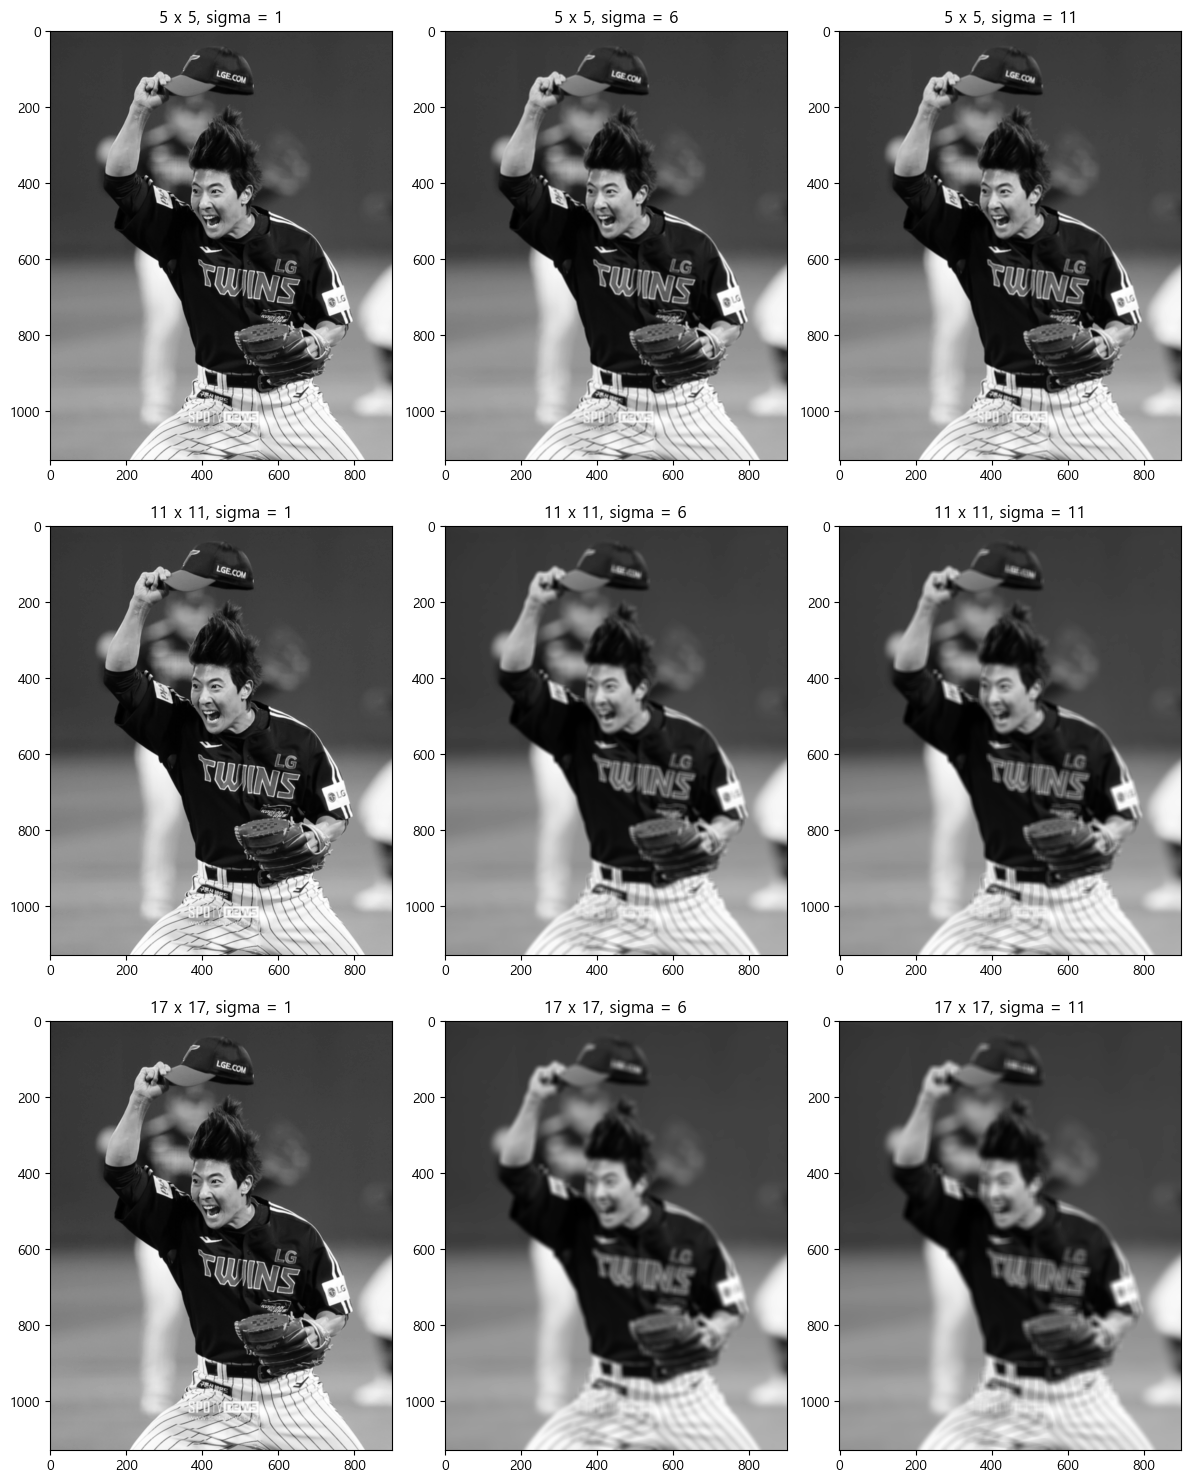

In [135]:
# d) Perform at least 9 different Gaussian filtering to an image (e.g., combinations of 3 different
# kernel sizes and sigma values). Show the filtered images in a single window.
# You are also asked to display a text caption describing the filter parameters on each filtered image.

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,15))
for i in range(3):
    for j in range(3):
        size = 6*i+5
        sigma = 5*j+1
        kernel = get_gaussian_filter_2d(size=size, sigma=sigma)
        ax[i, j].imshow(cross_correlation_2d(jy, kernel), cmap="gray")
        ax[i, j].set_title(f"{size} x {size}, sigma = {sigma}")

plt.tight_layout()
plt.show()

In [137]:
# e) Perform the Gaussian filtering by applying vertical and horizontal 1D kernels sequantially, and
# compare the result with a filtering with a 2D kernel. Specifically, visualize a pixel-wise
# difference map and report the sum of (absolute) intensity differences to the console. You are
# also required to report the computational times of 1D and 2D filterings to the console. Note
# that, you can report one of above 9 different cases (i.e. 17x17 s=6).

import time

# 1D kernels time evaluation
start_1d = time.time()
kernel_x = get_gaussian_filter_1d(size=17, sigma=11) # x-axis 1D gaussian filter
kernel_y = kernel_x.copy().reshape(size, 1) # y-axis 1D gaussian filter
filtered_x = cross_correlation_1d(jy, kernel_x)
filtered_y = cross_correlation_1d(filtered_x, kernel_y)
end_1d = time.time() - start_1d

# 2D kernels time evaluation
start_2d = time.time()
kernel = get_gaussian_filter_2d(size=17, sigma=11)
filtered_xy = cross_correlation_2d(jy, kernel)
end_2d = time.time() - start_2d

print("====== Computational Time Consumption =====")
print(f"1D filterings : {end_1d}\n2D filterings : {end_2d}")

# 왜 2D filterings가 더 오래걸리지 ... 이러면 안되는데 ... ㅠㅠ
# padding을 두번해서 더 오래걸리는듯 ?!

====== Computational Time Consumption =====
1D filterings : 3.7490391731262207
2D filterings : 3.0799880027770996
